## Load Modules

In [1]:
from DataLoading import load_and_partition_samples, mergeDatasets
from DetailsDisplayer import detailsDisplayer
import torch
from Evaluation import classify
from ShowImages import showImages
from Augmentation import generate
from torch.utils.data import DataLoader, Dataset
import gc


## General Properties

In [2]:
no_path = 'C:/Projects/Big-Files/brain_tumor_dataset/no'
yes_path = 'C:/Projects/Big-Files/brain_tumor_dataset/yes'
n_augmented_samples = 500
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

Device:  cuda


## Load Data

### Load the healthy samples

In [3]:
no_1_dataset, no_2_dataset, no_3_dataset, no_4_dataset = load_and_partition_samples(no_path)
print('no_1_dataset:', len(no_1_dataset), 'samples')
print('no_2_dataset:', len(no_2_dataset), 'samples')
print('no_3_dataset:', len(no_3_dataset), 'samples')
print('no_4_dataset:', len(no_4_dataset), 'samples')

no_1_dataset: 24 samples
no_2_dataset: 24 samples
no_3_dataset: 25 samples
no_4_dataset: 25 samples


### Load the samples with tumor

In [4]:
yes_1_dataset, yes_2_dataset, yes_3_dataset, yes_4_dataset = load_and_partition_samples(yes_path)
print('yes_1_dataset:', len(yes_1_dataset), 'samples')
print('yes_2_dataset:', len(yes_2_dataset), 'samples')
print('yes_3_dataset:', len(yes_3_dataset), 'samples')
print('yes_4_dataset:', len(yes_4_dataset), 'samples')

yes_1_dataset: 38 samples
yes_2_dataset: 38 samples
yes_3_dataset: 39 samples
yes_4_dataset: 40 samples


# Fold 1

In [5]:
no_123: DataLoader = mergeDatasets([no_1_dataset, no_2_dataset, no_3_dataset], ['n', 'n', 'n'], True)
detailsDisplayer(no_123)
yes_123: DataLoader = mergeDatasets([yes_1_dataset, yes_2_dataset, yes_3_dataset], ['y', 'y', 'y'], True)
detailsDisplayer(yes_123)

Batch Size: 16
Number of Batches: 5
Total Samples: 73
Samples per class:
Class 0: 73 samples
Class 1: 0 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Batch Size: 16
Number of Batches: 8
Total Samples: 115
Samples per class:
Class 0: 0 samples
Class 1: 115 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


### Train Loader

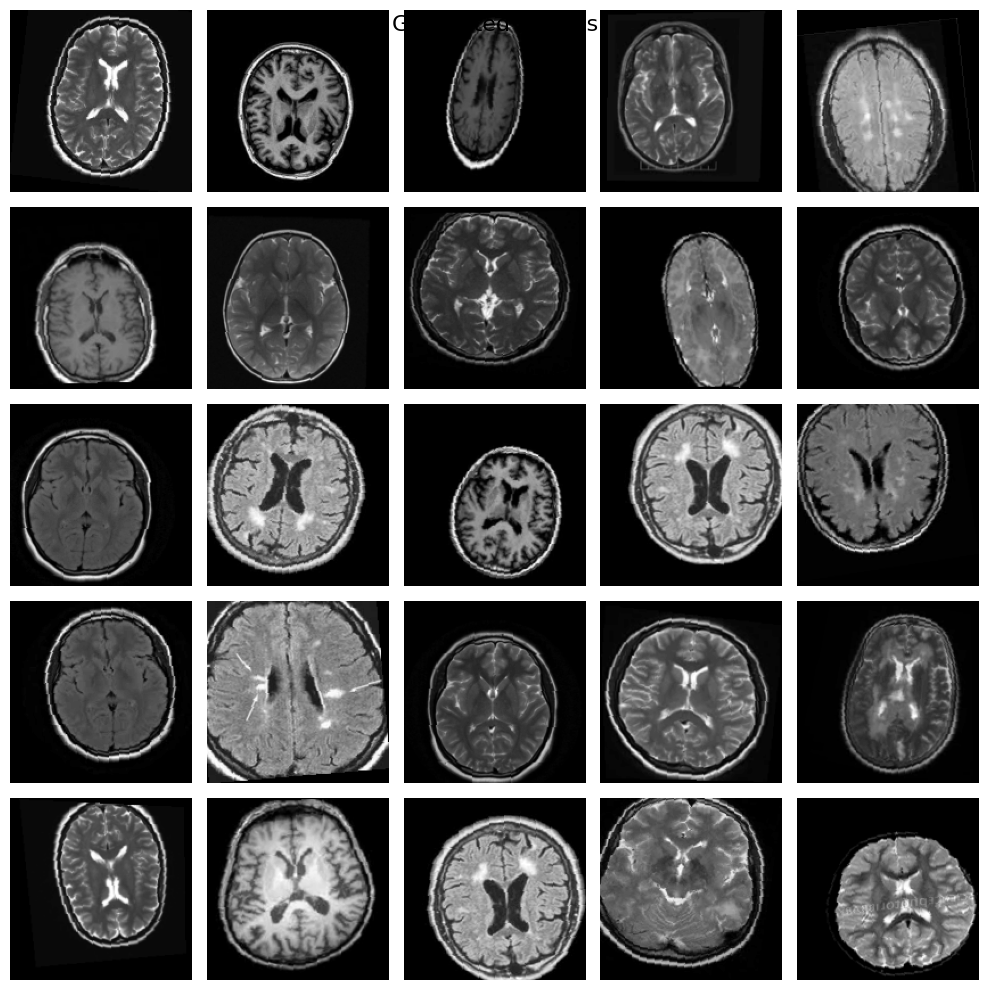

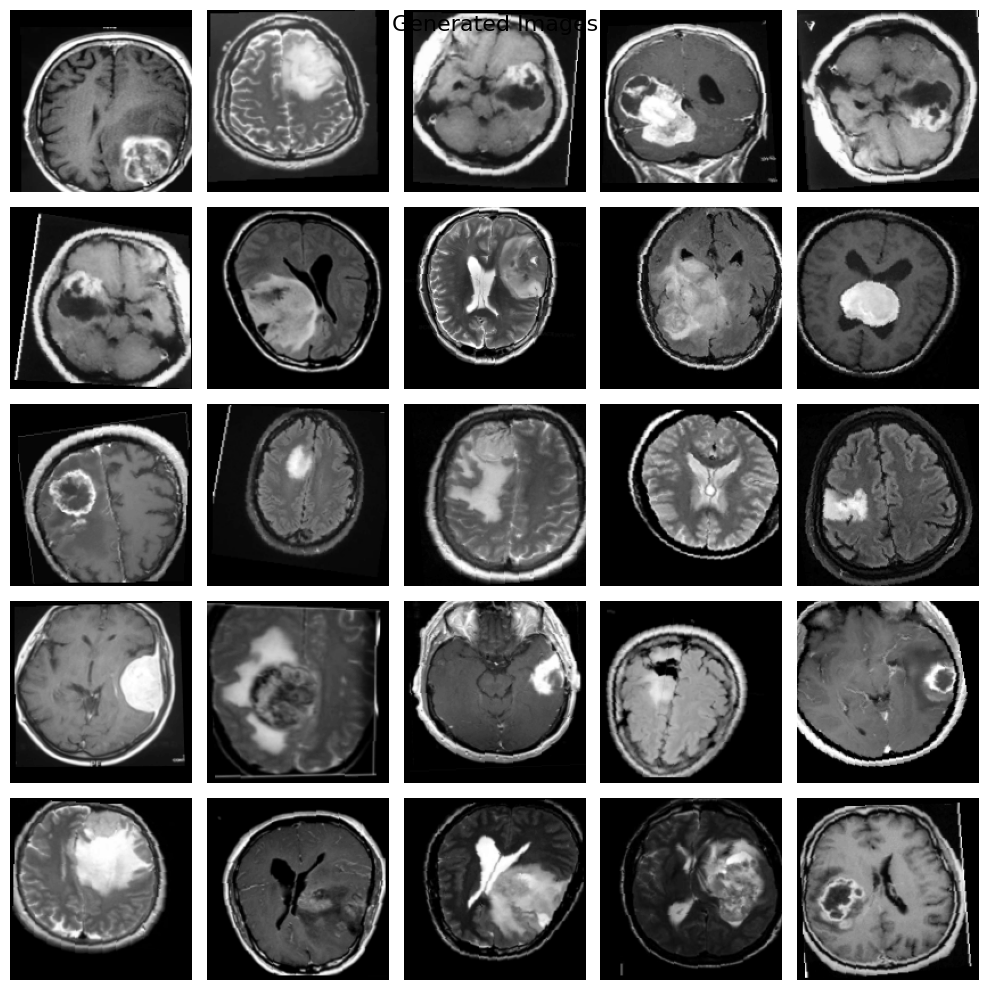

train_loader
Batch Size: 16
Number of Batches: 12
Total Samples: 188
Samples per class:
Class 0: 73 samples
Class 1: 115 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])


In [6]:
train_loader: DataLoader = None
if n_augmented_samples > 0:
    gen_no_123: Dataset = generate(num_images=n_augmented_samples, train_loader=no_123)
    gen_yes_123: Dataset = generate(num_images=n_augmented_samples, train_loader=yes_123)
    train_loader = mergeDatasets(
        [no_123.dataset, yes_123.dataset, gen_no_123, gen_yes_123], ["n", "y", "n", "y"], True
    )
    del gen_no_123, gen_yes_123
else:
    train_loader = mergeDatasets([no_123.dataset, yes_123.dataset], ["n", "y"], True)

del no_123, yes_123
gc.collect()
print('train_loader')
detailsDisplayer(train_loader)

### Test Loader

In [7]:
test_loader = mergeDatasets([no_4_dataset, yes_4_dataset], ["n", "y"], False)
print('test_loader')
detailsDisplayer(test_loader)

test_loader
Batch Size: 16
Number of Batches: 5
Total Samples: 65
Samples per class:
Class 0: 25 samples
Class 1: 40 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


## Classify

Epoch [1/40], Loss: 0.6653, Accuracy: 65.96%
Epoch [2/40], Loss: 0.5223, Accuracy: 72.87%
Epoch [3/40], Loss: 0.4678, Accuracy: 80.85%
Epoch [4/40], Loss: 0.6145, Accuracy: 62.23%
Epoch [5/40], Loss: 0.4933, Accuracy: 76.06%
Epoch [6/40], Loss: 0.3895, Accuracy: 84.57%
Epoch [7/40], Loss: 0.3959, Accuracy: 85.11%
Epoch [8/40], Loss: 0.4117, Accuracy: 85.11%
Epoch [9/40], Loss: 0.4048, Accuracy: 81.91%
Epoch [10/40], Loss: 0.2668, Accuracy: 89.36%
Epoch [11/40], Loss: 0.3462, Accuracy: 86.70%
Epoch [12/40], Loss: 0.2918, Accuracy: 87.77%
Epoch [13/40], Loss: 0.2408, Accuracy: 90.96%
Epoch [14/40], Loss: 0.1589, Accuracy: 94.68%
Epoch [15/40], Loss: 0.1999, Accuracy: 93.09%
Epoch [16/40], Loss: 0.1802, Accuracy: 92.55%
Epoch [17/40], Loss: 0.2706, Accuracy: 89.89%
Epoch [18/40], Loss: 0.1819, Accuracy: 93.09%
Epoch [19/40], Loss: 0.0914, Accuracy: 97.87%
Epoch [20/40], Loss: 0.1816, Accuracy: 93.09%
Epoch [21/40], Loss: 0.1753, Accuracy: 94.68%
Epoch [22/40], Loss: 0.1314, Accuracy: 95.7

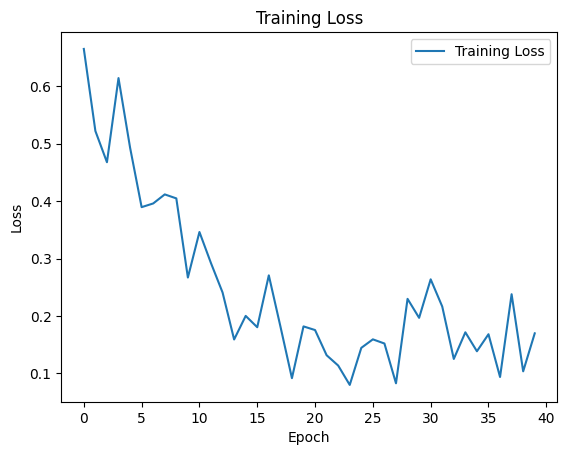

Test Loss: 0.2776, Test Accuracy: 89.23%
Class-wise Accuracy: [76.0, 97.5]


In [8]:
test_loss_1, test_acc_1, class_accuracy_1 = classify(train_loader, test_loader)

# Fold 2

In [9]:
no_124: DataLoader = mergeDatasets([no_1_dataset, no_2_dataset, no_4_dataset], ['n', 'n', 'n'], True)
detailsDisplayer(no_124)
yes_124: DataLoader = mergeDatasets([yes_1_dataset, yes_2_dataset, yes_4_dataset], ['y', 'y', 'y'], True)
detailsDisplayer(yes_124)

Batch Size: 16
Number of Batches: 5
Total Samples: 73
Samples per class:
Class 0: 73 samples
Class 1: 0 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Batch Size: 16
Number of Batches: 8
Total Samples: 116
Samples per class:
Class 0: 0 samples
Class 1: 116 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


### Train Loader

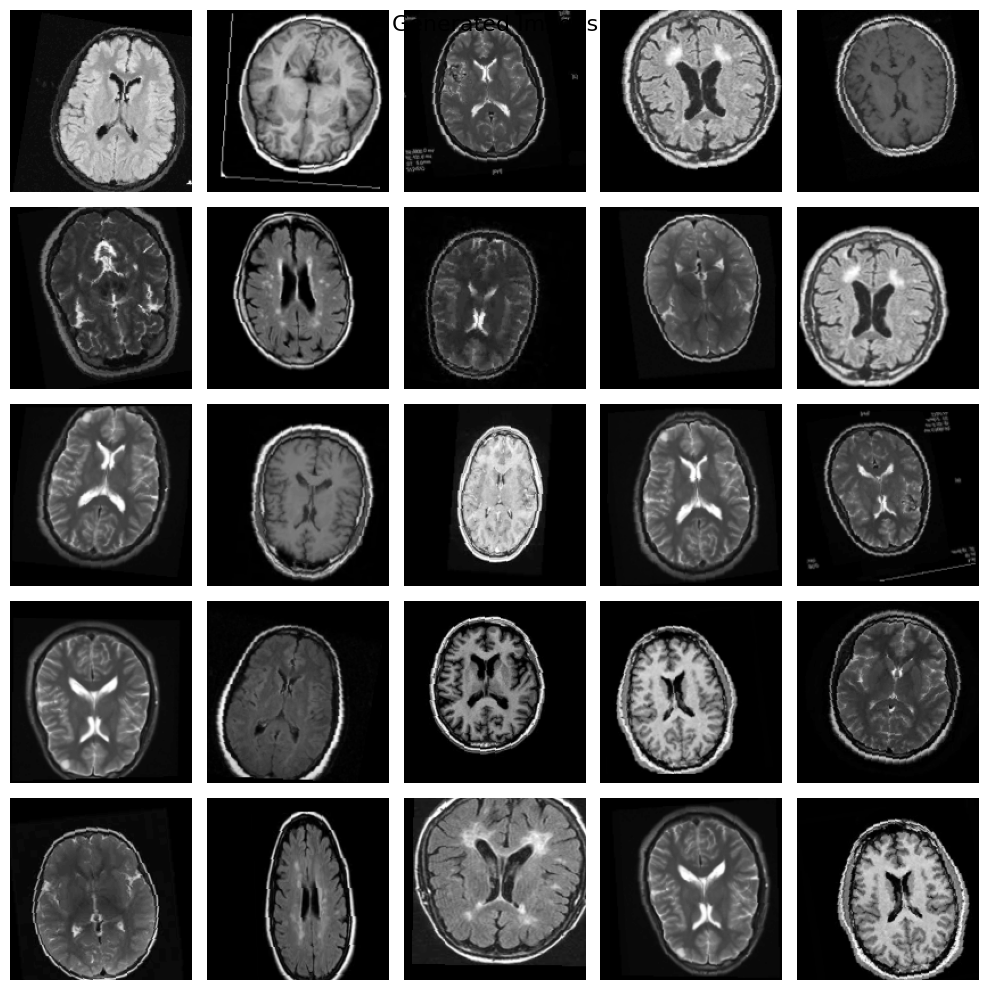

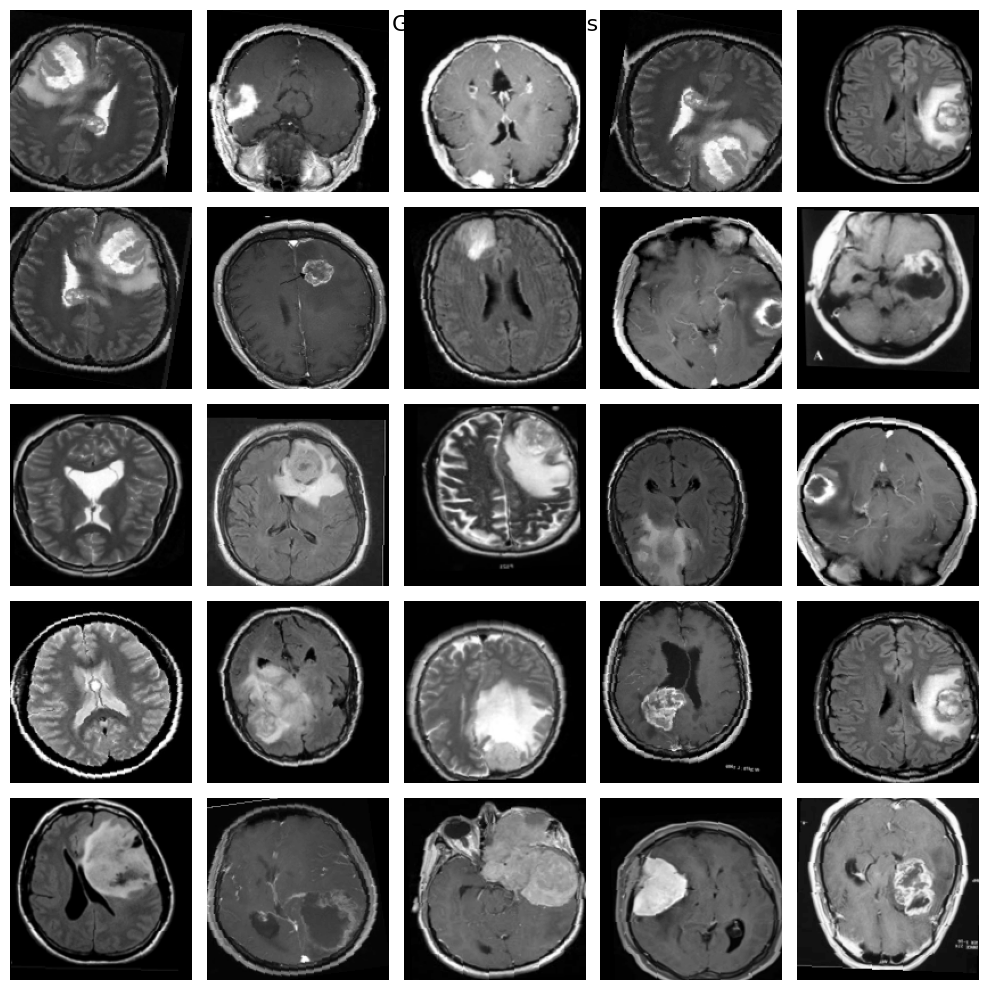

train_loader
Batch Size: 16
Number of Batches: 12
Total Samples: 189
Samples per class:
Class 0: 73 samples
Class 1: 116 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])


In [10]:
train_loader: DataLoader = None
if n_augmented_samples > 0:
    gen_no_124: Dataset = generate(num_images=n_augmented_samples, train_loader=no_124)
    gen_yes_124: Dataset = generate(num_images=n_augmented_samples, train_loader=yes_124)
    train_loader = mergeDatasets(
        [no_124.dataset, yes_124.dataset, gen_no_124, gen_yes_124], ["n", "y", "n", "y"], True
    )
    del gen_no_124, gen_yes_124
else:
    train_loader = mergeDatasets([no_124.dataset, yes_124.dataset], ["n", "y"], True)

del no_124, yes_124
gc.collect()
print('train_loader')
detailsDisplayer(train_loader)

### Test Loader

In [11]:
test_loader = mergeDatasets([no_3_dataset, yes_3_dataset], ["n", "y"], False)
print('test_loader')
detailsDisplayer(test_loader)

test_loader
Batch Size: 16
Number of Batches: 4
Total Samples: 64
Samples per class:
Class 0: 25 samples
Class 1: 39 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### Classify

Epoch [1/40], Loss: 0.7794, Accuracy: 63.49%
Epoch [2/40], Loss: 0.5547, Accuracy: 72.49%
Epoch [3/40], Loss: 0.4844, Accuracy: 77.78%
Epoch [4/40], Loss: 0.4909, Accuracy: 77.25%
Epoch [5/40], Loss: 0.5142, Accuracy: 74.07%
Epoch [6/40], Loss: 0.5336, Accuracy: 74.60%
Epoch [7/40], Loss: 0.4729, Accuracy: 79.37%
Epoch [8/40], Loss: 0.4549, Accuracy: 78.84%
Epoch [9/40], Loss: 0.3582, Accuracy: 84.13%
Epoch [10/40], Loss: 0.4186, Accuracy: 83.07%
Epoch [11/40], Loss: 0.3540, Accuracy: 83.07%
Epoch [12/40], Loss: 0.3253, Accuracy: 85.19%
Epoch [13/40], Loss: 0.3492, Accuracy: 85.71%
Epoch [14/40], Loss: 0.2382, Accuracy: 91.53%
Epoch [15/40], Loss: 0.3031, Accuracy: 85.19%
Epoch [16/40], Loss: 0.1994, Accuracy: 91.01%
Epoch [17/40], Loss: 0.2658, Accuracy: 89.95%
Epoch [18/40], Loss: 0.1980, Accuracy: 92.59%
Epoch [19/40], Loss: 0.2715, Accuracy: 89.95%
Epoch [20/40], Loss: 0.1513, Accuracy: 93.65%
Epoch [21/40], Loss: 0.1371, Accuracy: 96.30%
Epoch [22/40], Loss: 0.0762, Accuracy: 97.3

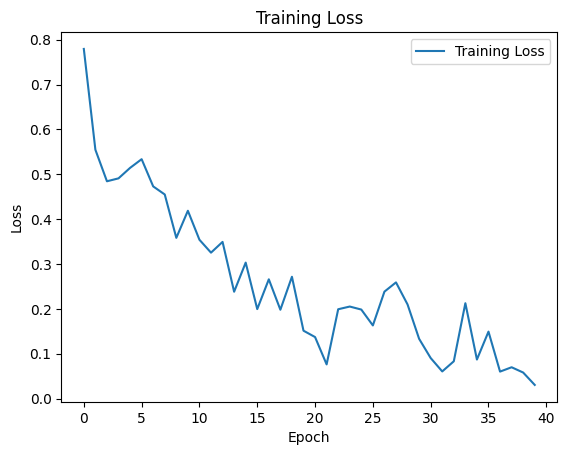

Test Loss: 0.9834, Test Accuracy: 81.25%
Class-wise Accuracy: [72.0, 87.17948717948718]


In [12]:
test_loss_2, test_acc_2, class_accuracy_2 = classify(train_loader, test_loader)

# Fold 3

In [13]:
no_134: DataLoader = mergeDatasets([no_1_dataset, no_3_dataset, no_4_dataset], ['n', 'n', 'n'], True)
detailsDisplayer(no_134)
yes_134: DataLoader = mergeDatasets([yes_1_dataset, yes_3_dataset, yes_4_dataset], ['y', 'y', 'y'], True)
detailsDisplayer(yes_134)

Batch Size: 16
Number of Batches: 5
Total Samples: 74
Samples per class:
Class 0: 74 samples
Class 1: 0 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Batch Size: 16
Number of Batches: 8
Total Samples: 117
Samples per class:
Class 0: 0 samples
Class 1: 117 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


### Train Loader

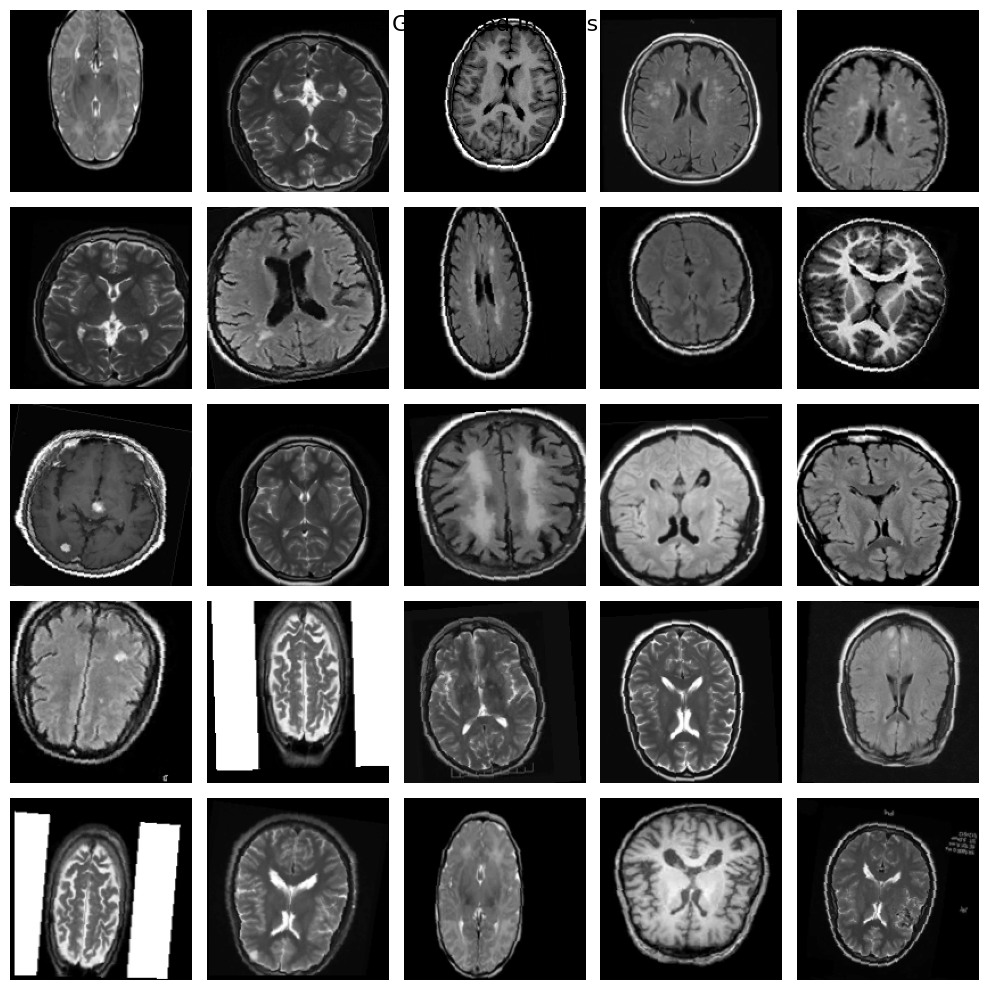

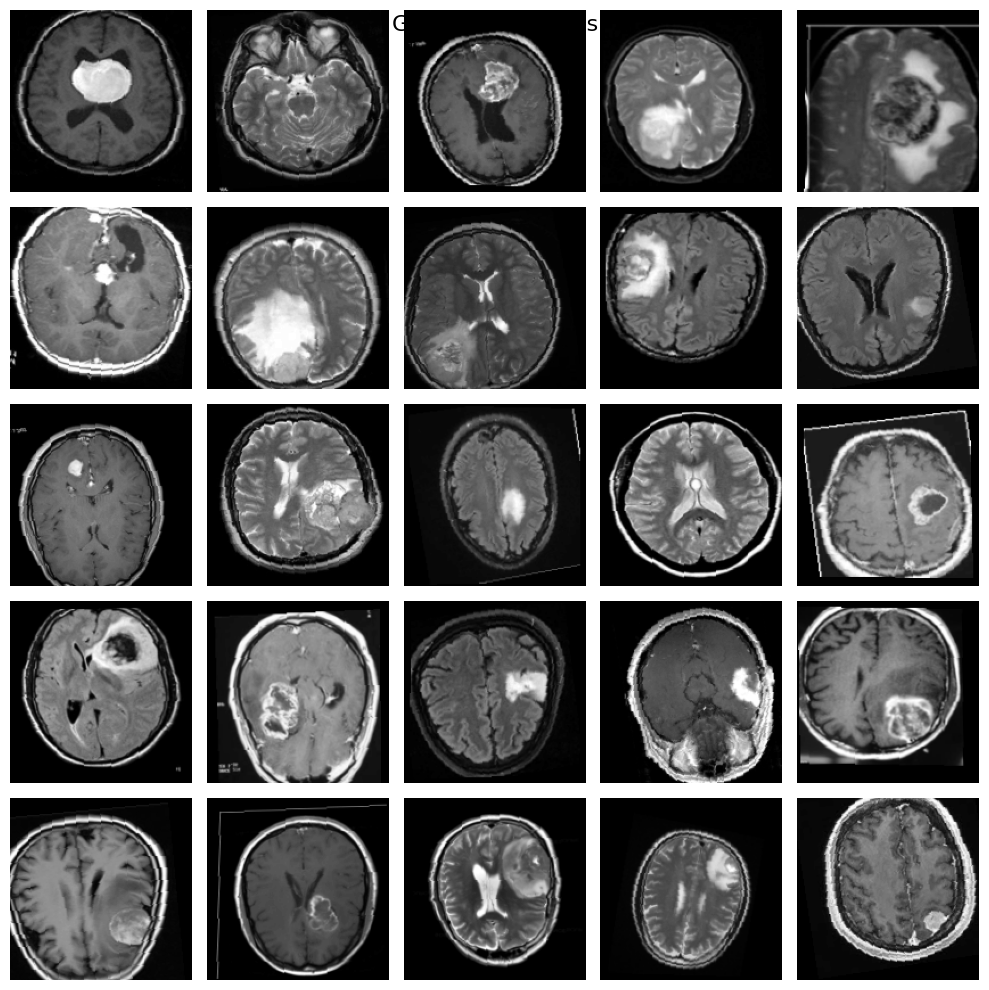

train_loader
Batch Size: 16
Number of Batches: 12
Total Samples: 191
Samples per class:
Class 0: 74 samples
Class 1: 117 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])


In [14]:
train_loader: DataLoader = None
if n_augmented_samples > 0:
    gen_no_134: Dataset = generate(num_images=n_augmented_samples, train_loader=no_134)
    gen_yes_134: Dataset = generate(num_images=n_augmented_samples, train_loader=yes_134)
    train_loader = mergeDatasets(
        [no_134.dataset, yes_134.dataset, gen_no_134, gen_yes_134], ["n", "y", "n", "y"], True
    )
    del gen_no_134, gen_yes_134
else:
    train_loader = mergeDatasets([no_134.dataset, yes_134.dataset], ["n", "y"], True)

del no_134, yes_134
gc.collect()
print('train_loader')
detailsDisplayer(train_loader)

### Test Loader

In [15]:
test_loader = mergeDatasets([no_2_dataset, yes_2_dataset], ["n", "y"], False)
print('test_loader')
detailsDisplayer(test_loader)

test_loader
Batch Size: 16
Number of Batches: 4
Total Samples: 62
Samples per class:
Class 0: 24 samples
Class 1: 38 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### Classify

Epoch [1/40], Loss: 0.7113, Accuracy: 58.12%
Epoch [2/40], Loss: 0.6277, Accuracy: 66.49%
Epoch [3/40], Loss: 0.5301, Accuracy: 71.20%
Epoch [4/40], Loss: 0.3762, Accuracy: 83.25%
Epoch [5/40], Loss: 0.6239, Accuracy: 79.06%
Epoch [6/40], Loss: 0.4239, Accuracy: 84.82%
Epoch [7/40], Loss: 0.4576, Accuracy: 81.68%
Epoch [8/40], Loss: 0.4131, Accuracy: 84.82%
Epoch [9/40], Loss: 0.3100, Accuracy: 87.96%
Epoch [10/40], Loss: 0.2666, Accuracy: 86.39%
Epoch [11/40], Loss: 0.3480, Accuracy: 86.39%
Epoch [12/40], Loss: 0.3134, Accuracy: 89.53%
Epoch [13/40], Loss: 0.2383, Accuracy: 91.62%
Epoch [14/40], Loss: 0.1696, Accuracy: 93.19%
Epoch [15/40], Loss: 0.2010, Accuracy: 91.10%
Epoch [16/40], Loss: 0.2287, Accuracy: 92.15%
Epoch [17/40], Loss: 0.1694, Accuracy: 92.15%
Epoch [18/40], Loss: 0.2564, Accuracy: 89.53%
Epoch [19/40], Loss: 0.1602, Accuracy: 94.24%
Epoch [20/40], Loss: 0.1220, Accuracy: 95.81%
Epoch [21/40], Loss: 0.0687, Accuracy: 96.86%
Epoch [22/40], Loss: 0.0592, Accuracy: 97.3

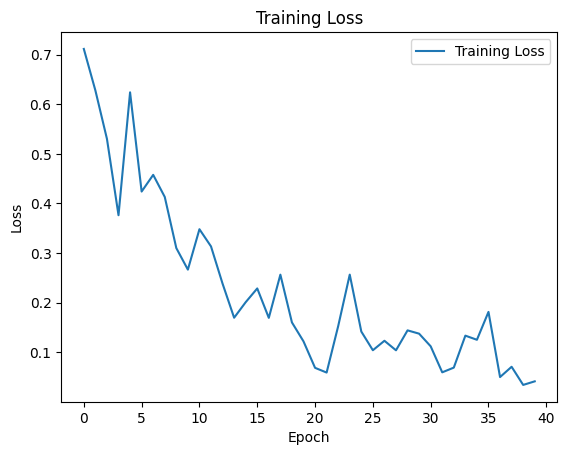

Test Loss: 0.4719, Test Accuracy: 82.26%
Class-wise Accuracy: [100.0, 71.05263157894737]


In [16]:
test_loss_3, test_acc_3, class_accuracy_3 = classify(train_loader, test_loader)

# Fold 4

In [17]:
no_234: DataLoader = mergeDatasets([no_2_dataset, no_3_dataset, no_4_dataset], ['n', 'n', 'n'], True)
detailsDisplayer(no_234)
yes_234: DataLoader = mergeDatasets([yes_2_dataset, yes_3_dataset, yes_4_dataset], ['y', 'y', 'y'], True)
detailsDisplayer(yes_234)

Batch Size: 16
Number of Batches: 5
Total Samples: 74
Samples per class:
Class 0: 74 samples
Class 1: 0 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Batch Size: 16
Number of Batches: 8
Total Samples: 117
Samples per class:
Class 0: 0 samples
Class 1: 117 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


### Train Loader

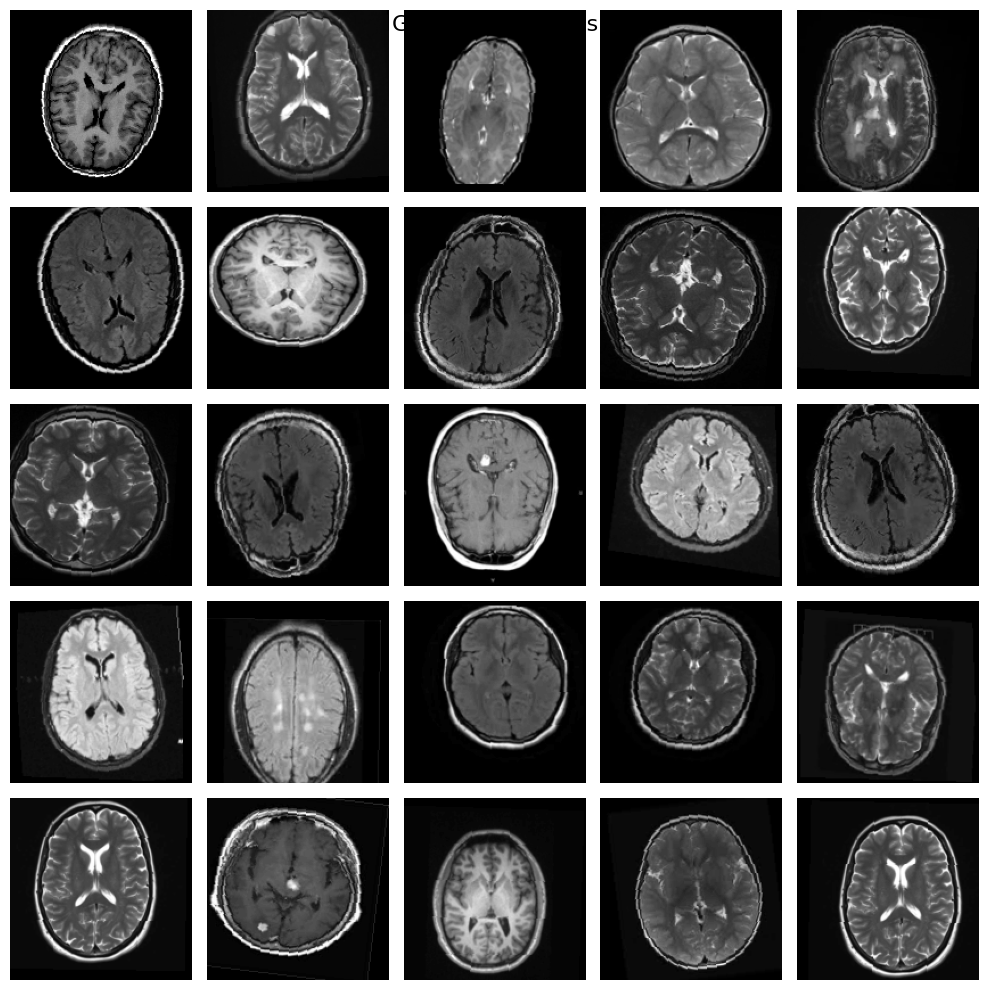

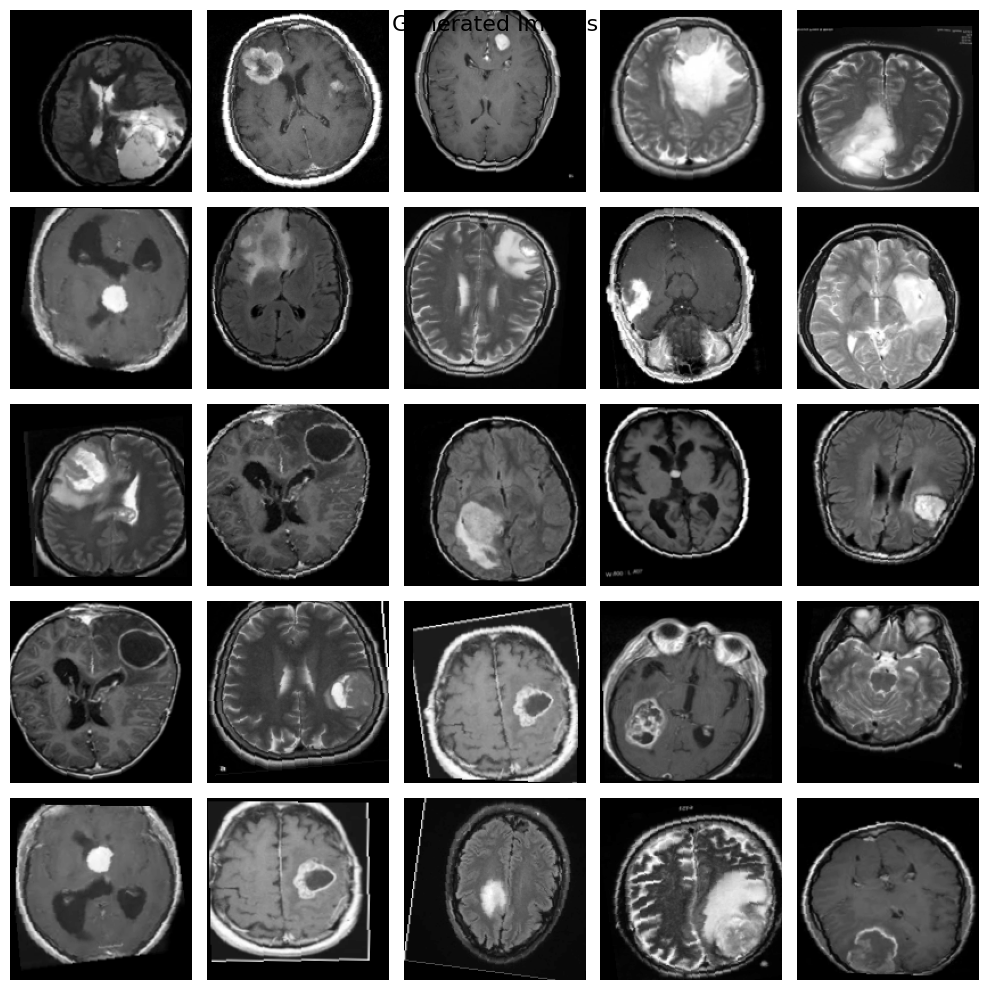

train_loader
Batch Size: 16
Number of Batches: 12
Total Samples: 191
Samples per class:
Class 0: 74 samples
Class 1: 117 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0])


In [18]:
train_loader: DataLoader = None
if n_augmented_samples > 0:
    gen_no_234: Dataset = generate(num_images=n_augmented_samples, train_loader=no_234)
    gen_yes_234: Dataset = generate(num_images=n_augmented_samples, train_loader=yes_234)
    train_loader = mergeDatasets(
        [no_234.dataset, yes_234.dataset, gen_no_234, gen_yes_234], ["n", "y", "n", "y"], True
    )
    del gen_no_234, gen_yes_234
else:
    train_loader = mergeDatasets([no_234.dataset, yes_234.dataset], ["n", "y"], True)

del no_234, yes_234
gc.collect()
print('train_loader')
detailsDisplayer(train_loader)

### Test Loader

In [19]:
test_loader = mergeDatasets([no_1_dataset, yes_1_dataset], ["n", "y"], False)
print('test_loader')
detailsDisplayer(test_loader)

test_loader
Batch Size: 16
Number of Batches: 4
Total Samples: 62
Samples per class:
Class 0: 24 samples
Class 1: 38 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### Classify

Epoch [1/40], Loss: 0.7837, Accuracy: 61.78%
Epoch [2/40], Loss: 0.5906, Accuracy: 72.77%
Epoch [3/40], Loss: 0.4809, Accuracy: 82.20%
Epoch [4/40], Loss: 0.3866, Accuracy: 82.20%
Epoch [5/40], Loss: 0.3787, Accuracy: 82.20%
Epoch [6/40], Loss: 0.3145, Accuracy: 85.86%
Epoch [7/40], Loss: 0.3516, Accuracy: 84.82%
Epoch [8/40], Loss: 0.3055, Accuracy: 86.91%
Epoch [9/40], Loss: 0.2690, Accuracy: 89.53%
Epoch [10/40], Loss: 0.3561, Accuracy: 86.39%
Epoch [11/40], Loss: 0.2247, Accuracy: 90.58%
Epoch [12/40], Loss: 0.2329, Accuracy: 91.10%
Epoch [13/40], Loss: 0.2311, Accuracy: 90.58%
Epoch [14/40], Loss: 0.3087, Accuracy: 87.43%
Epoch [15/40], Loss: 0.2548, Accuracy: 88.48%
Epoch [16/40], Loss: 0.2228, Accuracy: 92.67%
Epoch [17/40], Loss: 0.1780, Accuracy: 93.72%
Epoch [18/40], Loss: 0.1551, Accuracy: 93.72%
Epoch [19/40], Loss: 0.1515, Accuracy: 94.24%
Epoch [20/40], Loss: 0.2705, Accuracy: 92.67%
Epoch [21/40], Loss: 0.1769, Accuracy: 93.72%
Epoch [22/40], Loss: 0.1737, Accuracy: 93.1

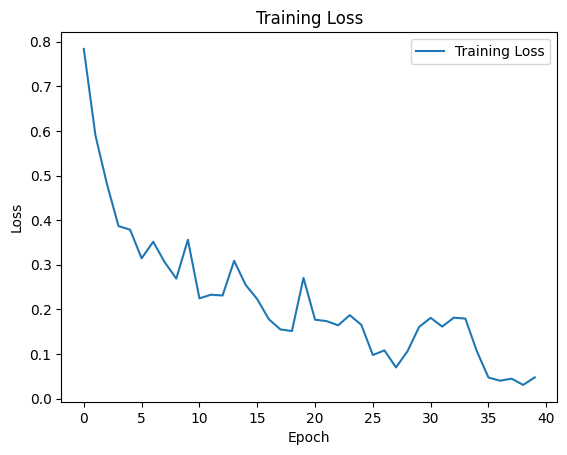

Test Loss: 0.5690, Test Accuracy: 77.42%
Class-wise Accuracy: [62.5, 86.84210526315789]


In [20]:
test_loss_4, test_acc_4, class_accuracy_4 = classify(train_loader, test_loader)

# Summary

In [21]:
avg_test_loss = (test_loss_1 + test_loss_2 + test_loss_3 + test_loss_4) / 4
avg_test_acc = (test_acc_1 + test_acc_2 + test_acc_3 + test_acc_4) / 4
avg_class_accuracy_0 = (class_accuracy_1[0] + class_accuracy_2[0] + class_accuracy_3[0] + class_accuracy_4[0]) / 4
avg_class_accuracy_1 = (class_accuracy_1[1] + class_accuracy_2[1] + class_accuracy_3[1] + class_accuracy_4[1]) / 4
print(f"Average Test Loss: {avg_test_loss:.4f}, Average Test Accuracy: {avg_test_acc:.2f}%")
print("Average Class 0 Accuracy:", avg_class_accuracy_0)
print("Average Class 1 Accuracy:", avg_class_accuracy_1)

Average Test Loss: 0.5755, Average Test Accuracy: 82.54%
Average Class 0 Accuracy: 77.625
Average Class 1 Accuracy: 85.64355600539811
